# Titanic Data Analysis 泰坦尼克号数据分析

这里的数据包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。

Kaggle网站上查看这个数据集的详细描述： https://www.kaggle.com/c/titanic/data

 （ Kaggle是一个数据分析建模的应用竞赛平台，有点类似KDD-CUP（国际知识发现和数据挖掘竞赛 ）

### 思考可以用数据集回答：

从泰坦尼克号数据中，有哪些因素会让船上的人生还率更高？


### 分析需要包含如下内容：

 （ 通过NumPy和Pandas进行调查 ）

● 指定所分析数据集的注解

● 对所提出问题的陈述

● 针对这些问题进行的调查的描述

● 进行的所有数据处理的记录

● 传达最终结果的摘要统计量和图形

# 1. 导入数据

## 1.1 导入CSV

In [1]:
# 引入需要用的库
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl #添加中文支持
mpl.rcParams['font.sans-serif']=['SimHei']

filename = 'titanic-data.csv'
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


## 1.2 详细信息

In [2]:
df.head()  # 显示前五个

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.3 数据说明

根据导入数据分析,本数据有12个变量,891个样本,变量有12个。

变量及说明和值的类型:

● PassengerId: 乘客ID

● Survived: 生还与否 0=No, 1=Yes

● Pclass: 客舱等级 1为高级, 2为中级, 3为普通

● Name: 乘客名字

● Sex: 性别 male,female

● Age: 年龄 如果年龄小于1岁的用分数表示

● SibSp: 亲属数目（包括兄弟姐妹和夫妻关系）

● Parch: 直系亲属数目包括父母与小孩个数

● Ticket: 票号

● Fare: 票价

● Cabin: 船舱号

● Embarked: 登船口岸 S,Q,C

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


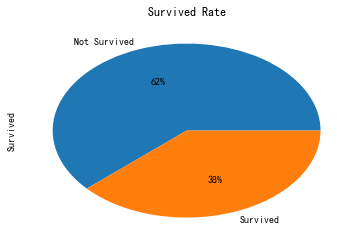

mean= 0.383838383838


In [4]:
df.Survived.value_counts().plot(kind='pie',autopct='%.0f%%',labels=['Not Survived','Survived'],title='Survived Rate')
plt.show()
print 'mean=' ,df.Survived.mean()

● 全体乘客的生存率： 约38%

## 1.4 修改数据

存在数据缺失的有年龄,船舱号,上船地点：

● Age: 年龄 年龄缺失有891-714=177,用求平均数加减标准差乘以随机数来生成

● Cabin: 船舱号 只有204名乘客是已知，缺失过多，且生存与否关系不明显所以不使用这个参数

● Embarked: 登船口岸 登船口岸缺失不多,以最多的登船口岸S来填充

● Ticket: 票号 票号意义不大主观上不考虑

In [5]:
# Age:年龄缺失有891-714=177,缺失的可以用求平均数加减标准差乘以随机数来生成
mean_age = df["Age"].mean()
std_age = df["Age"].std()
count_nan_age = df["Age"].isnull().sum()
rand_1 = np.random.randint(mean_age - std_age, mean_age + std_age, size = count_nan_age)
df["Age"][np.isnan(df["Age"])] = rand_1

# Embarked:上船地点缺失不多,以最多的上船地址S来填充
df.Embarked[df.Embarked.isnull()] = df.Embarked.dropna().mode().values

# Cabin:只有204名乘客是已知，缺失过多，且生存与否关系不明显主观上不考虑
df = df.drop("Cabin",axis=1)

# Ticket:票号意义不大主观上不考虑
df = df.drop("Ticket",axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 59.2+ KB


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


遇到缺值的情况，一般有几种常见的处理方式：

● 如果缺失值的样本占总数的比例极高，可直接丢弃，因为它或许是噪点。

● 如果缺失值的样本适中，而且该属性不是连续值特征，可以把NaN作为新类别，加入到类别特征中去。

● 如果缺失值的样本适中，而该属性又是连续型的，有时候就会考虑给定一个离散化值。

● 有些情况下，缺失的值个数并不是特别多，也可以试着根据已有的值，拟合一下数据补充上。

Referred to: http://www.jianshu.com/p/3ecf2718b033

# 2. 分析数据

## 提出问题

有哪些因素和生存Survived有关系：

● 生存与Sibsp/Parch家庭成员的关系

● 生存与Pclass客舱等级的关系

● 生存与Sex性别的关系

● 生存与Embarked上船地点的关系

● 生存与Age年龄的关系

● 生存与Fare票价费用的关系

## 2.1 生存与Sibsp/Parch家庭成员的关系

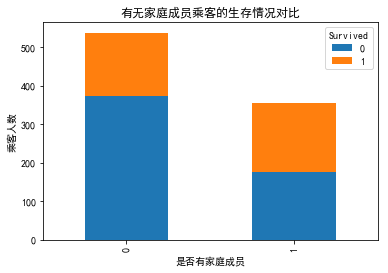

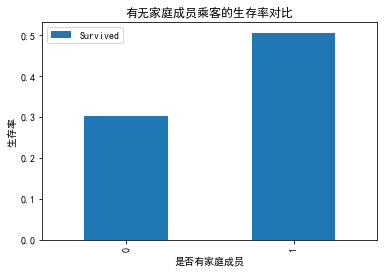

In [6]:
# 家庭成员考虑Sibsp和Parch的情况
df['Family']=df['SibSp']+df['Parch']
def num_1(x):
    if x>0:
        return 1
    else:
        return 0
df['Family'] = df['Family'].apply(num_1)

Family_df=df[['Family','Survived']]

Family_df.groupby(['Family','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title(u"有无家庭成员乘客的生存情况对比")
plt.ylabel(u"乘客人数")
plt.xlabel(u"是否有家庭成员") # 0 没有 ； 1 有

Family_df.groupby(['Family']).mean().plot(kind='bar')
plt.title(u"有无家庭成员乘客的生存率对比")
plt.ylabel(u"生存率")
plt.xlabel(u"是否有家庭成员") # 0 没有 ； 1 有
plt.show()

### ● 说明：从样本上看有家庭成员的获救率相对较高

## 2.2 生存与Pclass客舱等级的关系

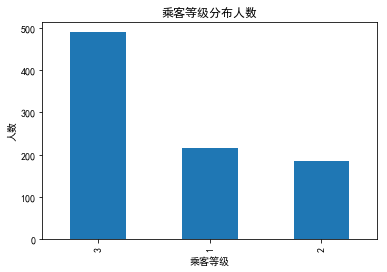

In [7]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

df.Pclass.value_counts().plot(kind="bar")
plt.title(u"乘客等级分布人数")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")
plt.show()

进一步分析各等级乘客的生存情况：

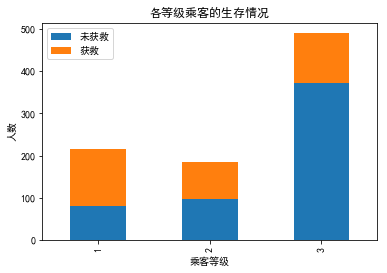

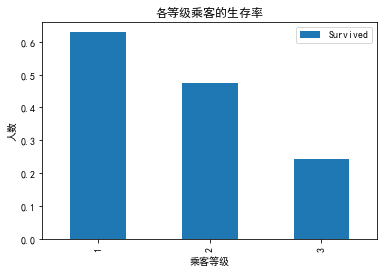

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_P0 = df.Pclass[df.Survived == 0].value_counts()
Survived_P1 = df.Pclass[df.Survived == 1].value_counts()
situation = pd.DataFrame({u"获救":Survived_P1,u"未获救":Survived_P0})
situation.plot(kind='bar',stacked=True)
plt.title(u"各等级乘客的生存情况")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")

Pclass_df=df[["Pclass","Survived"]]
Pclass_df.groupby(['Pclass']).mean().plot(kind='bar')
plt.title(u"各等级乘客的生存率")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")
plt.show()

### ● 说明：高等舱里面获救的几率就要大得多，即等级越高，越容易被救

## 2.3 生存与Sex性别的关系

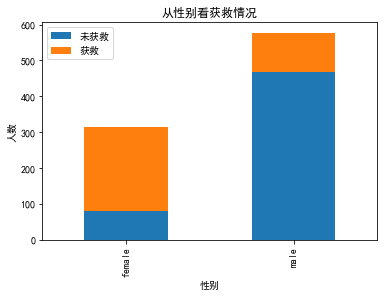

In [9]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_S0 = df.Sex[df.Survived == 0].value_counts()
Survived_S1 = df.Sex[df.Survived == 1].value_counts()
situation = pd.DataFrame({u"获救":Survived_S1,u"未获救":Survived_S0})
situation.plot(kind='bar',stacked=True)
plt.title(u"从性别看获救情况")
plt.xlabel(u"性别")
plt.ylabel(u"人数")
plt.show()

### ● 说明：从图表中明显可以看出是女性获救机率比男性高

## 2.4 生存与Embarked登船口岸的关系

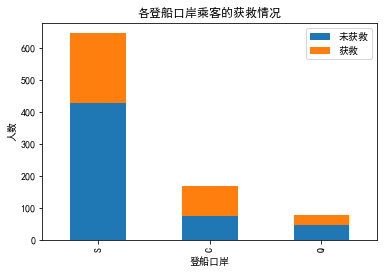

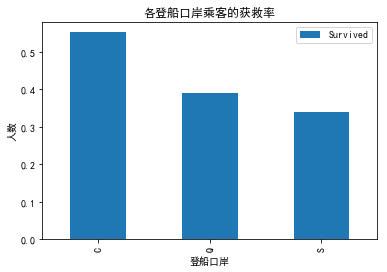

In [10]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_E0 = df.Embarked[df.Survived == 0].value_counts()
Survived_E1 = df.Embarked[df.Survived == 1].value_counts()
situation = pd.DataFrame({u"获救":Survived_E1,u"未获救":Survived_E0})
situation.plot(kind='bar',stacked=True)
plt.title(u"各登船口岸乘客的获救情况")
plt.xlabel(u"登船口岸")
plt.ylabel(u"人数")

Embarked_df=df[["Embarked","Survived"]]
Embarked_df.groupby(['Embarked']).mean().plot(kind='bar')
plt.title(u"各登船口岸乘客的获救率")
plt.xlabel(u"登船口岸")
plt.ylabel(u"人数")
plt.show()

### ● 说明：C登船口岸的乘客生存率略高，不过总体关系不大

## 2.5 生存与Age年龄的关系

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


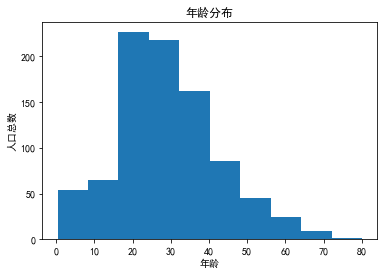

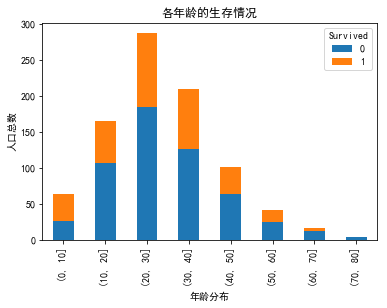

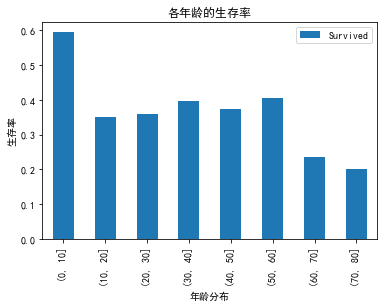

In [11]:
fig=plt.figure()
fig.set(alpha=0.2)

ax=fig.add_subplot(1,1,1)
ax.hist(df['Age'],bins=10)
plt.title(u"年龄分布")
plt.xlabel(u"年龄")
plt.ylabel(u"人口总数")

Age_df=df[['Age','Survived']]
bins = np.arange(0,90,10)
Age_df['Age_group']=pd.cut(Age_df['Age'], bins)
Age_df.groupby(['Age_group','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)
plt.title(u"各年龄的生存情况")
plt.xlabel(u"年龄分布")
plt.ylabel(u"人口总数")

Age_df = Age_df.drop("Age",axis=1)
Age_df.groupby(['Age_group']).mean().plot(kind='bar',stacked=True)
plt.title(u"各年龄的生存率")
plt.xlabel(u"年龄分布")
plt.ylabel(u"生存率")
plt.show()

### ● 说明：小于10岁的小孩的生存率比起其它年龄段的高

## 2.6 生存与Fare票价费用的关系

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


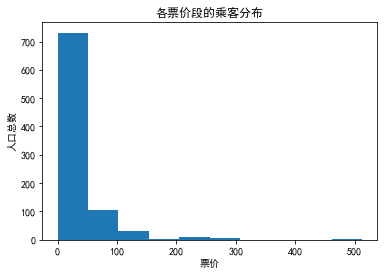

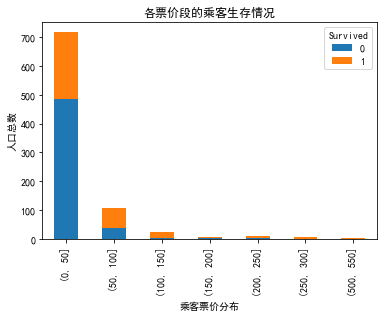

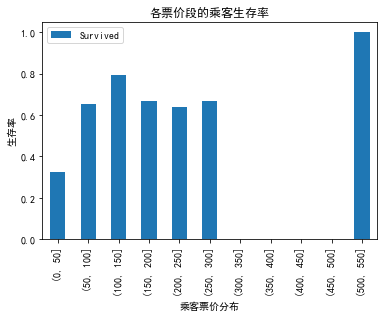

In [12]:
fig=plt.figure()
fig.set(alpha=0.2)

ax=fig.add_subplot(1,1,1)
ax.hist(df['Fare'],bins=10)
plt.title(u"各票价段的乘客分布")
plt.xlabel(u"票价")
plt.ylabel(u"人口总数")

Fare_df=df[['Fare','Survived']]
bins = np.arange(0,600,50)
Fare_df['Fare_group']=pd.cut(Fare_df['Fare'], bins)
Fare_df.groupby(['Fare_group','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)
plt.title(u"各票价段的乘客生存情况")
plt.xlabel(u"乘客票价分布")
plt.ylabel(u"人口总数")

Fare_df = Fare_df.drop("Fare",axis=1)
Fare_df.groupby(['Fare_group']).mean().plot(kind='bar',stacked=True)
plt.title(u"各票价段的乘客生存率")
plt.xlabel(u"乘客票价分布")
plt.ylabel(u"生存率")
plt.show()

### ● 说明：根据分析图看，大多数人属于50元以内且生存率相对最低，超过500元的生存率最高，但是只有一个，属于异常值

# 3. 得出结论

● 从样本的生存比例和数据相关性上看：

  高等舱里面获救的几率高；

  女性获救的机率比男性的高；

  小于10岁的小孩的生存率比起其它年龄段的高；

  票价较低的生存率相对最低；

  有家庭成员的获救率相对较高；

  C登船口岸的乘客生存率略高，但总体关系不大。

● 因此，高等舱的乘客，女性，儿童以及有家人成员的乘客有更高的生还率。